1. Аналогично семинару запускаем DESeq в R Studio - скрипт прилагается

и получаем таблицу с нормализованной экспрессией на выходе и DESeq2 plot

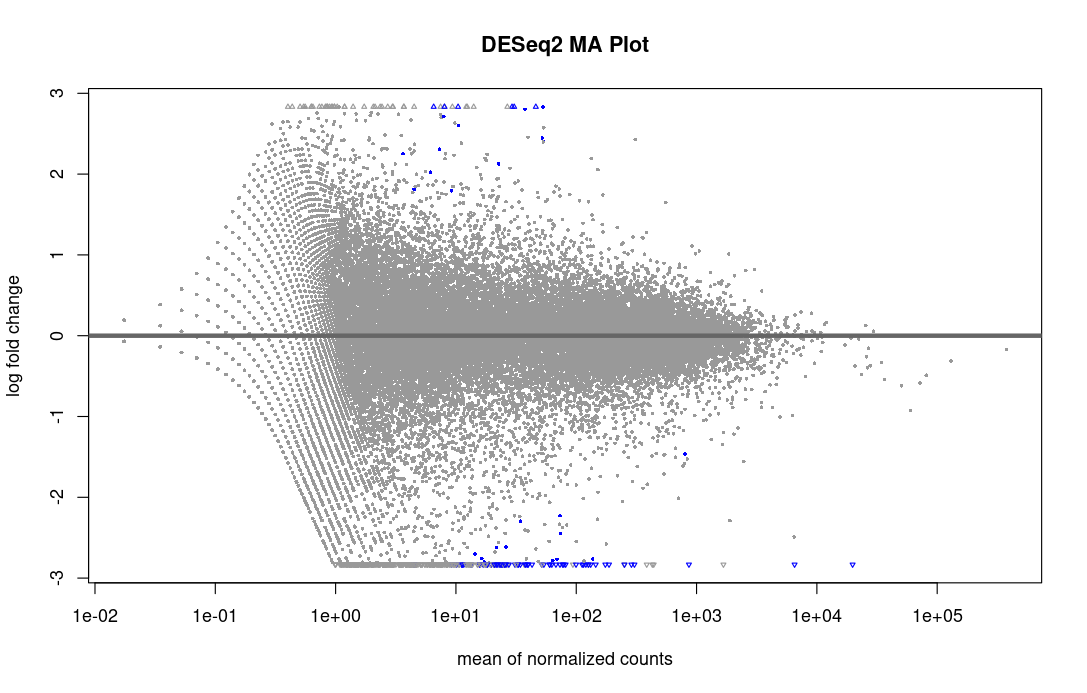

и сразу приведу полученный volcano plot

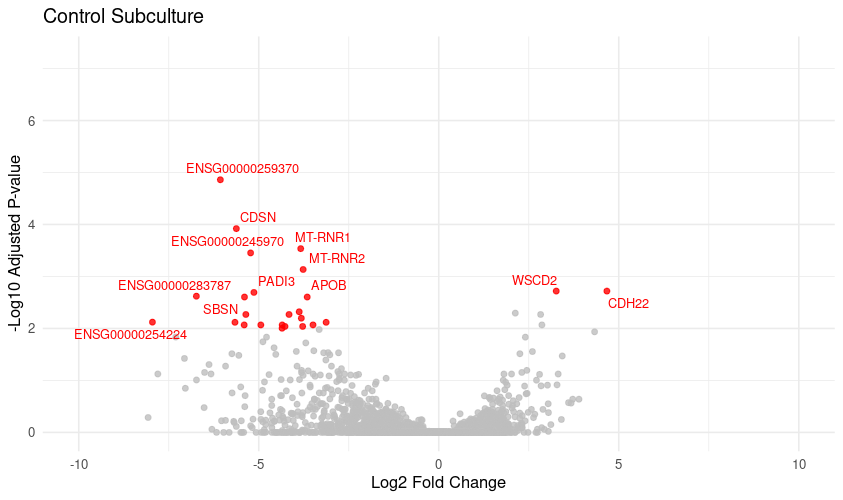

2. Теперь строим РСА на полученных данных

In [3]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler

/scratch/ipykernel_3016757/2253196934.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8771929824561404' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_normalized.loc[gene] = dataset_normalized.loc[gene]/mean_gene_lenghts[gene]*10**3
/scratch/ipykernel_3016757/2253196934.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '62.6865671641791' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_normalized.loc[gene] = dataset_normalized.loc[gene]/mean_gene_lenghts[gene]*10**3
/scratch/ipykernel_3016757/2253196934.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.7313432835820897' has dtype incompatible with int64, please explicitly cast to a

Text(0.5, 1.0, 'PCA of log(TPM) expression values')

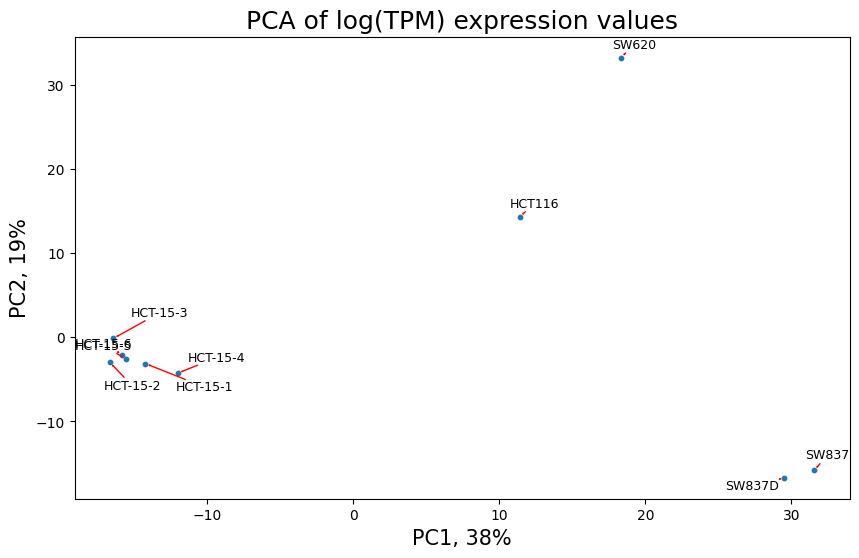

In [3]:
raw_expressions = pd.read_csv('/projects/mipt_dbmp_biotechnology/rna_seq_diff_exp/raw_expression_cells.tsv', sep='\t', index_col=0)

raw_expressions.rename(columns = {'R1-1': 'HCT-15-4', 
                                     'R1-2': 'HCT-15-5',
                                     'R1-3': 'HCT-15-6',
                                     'HCT_WT1': 'HCT-15-1',
                                     'HCT_WT2': 'HCT-15-2',
                                     'HCT_WT3': 'HCT-15-3',
                                    }, inplace = True)

dataset_normalized = raw_expressions.copy()
mean_gene_lenghts = pd.read_csv('/projects/mipt_dbmp_biotechnology/rna_seq_diff_exp/gene_length.tsv', sep = '\t', index_col=0)['median_trna_lenght']
for gene in dataset_normalized.index:
    dataset_normalized.loc[gene] = dataset_normalized.loc[gene]/mean_gene_lenghts[gene]*10**3
    
dataset_normalized = dataset_normalized.apply(lambda x: x/x.sum()*10**6)

plt.figure(figsize=(10, 6))

pca = PCA(n_components=2)
pca_res = pca.fit_transform(dataset_normalized.applymap(lambda x: np.log10(x+1)).T).T
plt.scatter(pca_res[0], pca_res[1], s = 10)

expl_var = pca.explained_variance_ratio_

# Add labels and legend
plt.xlabel(f'PC1, {round(expl_var[0]*100)}%', fontsize=15)
plt.ylabel(f'PC2, {round(expl_var[1]*100)}%', fontsize=15)

annotations = []

for i, label in enumerate(dataset_normalized.columns):
    annotations.append(plt.text(pca_res[0][i], pca_res[1][i], label.split('_S')[0], fontsize=9, ha='right'))

adjust_text(annotations, expand=(1.2, 2), arrowprops=dict(arrowstyle='->', color='red'))

plt.title('PCA of log(TPM) expression values', fontsize=18)

/scratch/ipykernel_3016757/670278775.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pca_res = pca.fit_transform(dataset_normalized.applymap(lambda x: np.log10(x+1)).T).T


Text(0.5, 1.0, 'PCA of log(TPM) normalizer expression results')

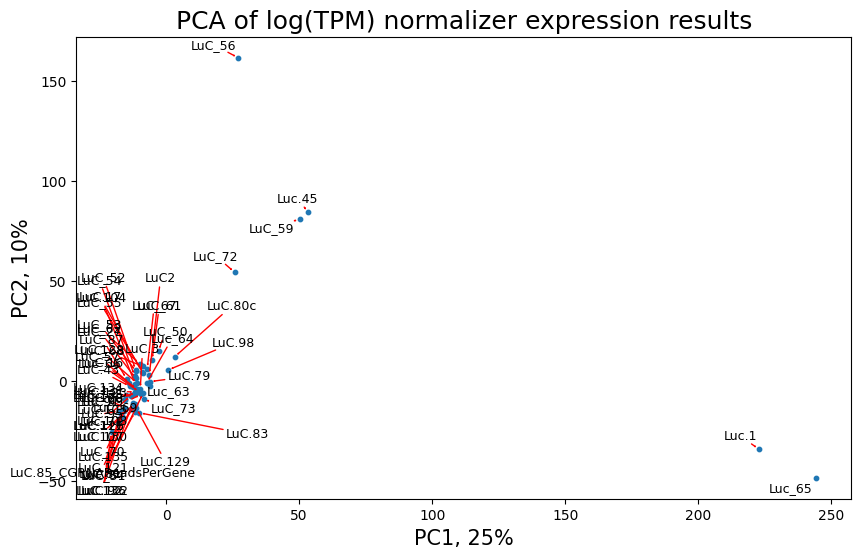

In [7]:
raw_expressions = pd.read_csv('~/bioinf_2025_local/class_14/normalized_counts_ici_samples.tsv', sep='\t', index_col=0)

# raw_expressions.rename(columns = {'R1-1': 'HCT-15-4', 
#                                      'R1-2': 'HCT-15-5',
#                                      'R1-3': 'HCT-15-6',
#                                      'HCT_WT1': 'HCT-15-1',
#                                      'HCT_WT2': 'HCT-15-2',
#                                      'HCT_WT3': 'HCT-15-3',
#                                     }, inplace = True)

dataset_normalized = raw_expressions
# mean_gene_lenghts = pd.read_csv('/projects/mipt_dbmp_biotechnology/rna_seq_diff_exp/gene_length.tsv', sep = '\t', index_col=0)['median_trna_lenght']
# for gene in dataset_normalized.index:
#     dataset_normalized.loc[gene] = dataset_normalized.loc[gene]/mean_gene_lenghts[gene]*10**3
    
# dataset_normalized = dataset_normalized.apply(lambda x: x/x.sum()*10**6)

plt.figure(figsize=(10, 6))

pca = PCA(n_components=2)
pca_res = pca.fit_transform(dataset_normalized.applymap(lambda x: np.log10(x+1)).T).T
plt.scatter(pca_res[0], pca_res[1], s = 10)

expl_var = pca.explained_variance_ratio_

# Add labels and legend
plt.xlabel(f'PC1, {round(expl_var[0]*100)}%', fontsize=15)
plt.ylabel(f'PC2, {round(expl_var[1]*100)}%', fontsize=15)

annotations = []

for i, label in enumerate(dataset_normalized.columns):
    annotations.append(plt.text(pca_res[0][i], pca_res[1][i], label.split('_S')[0], fontsize=9, ha='right'))

adjust_text(annotations, expand=(1.2, 2), arrowprops=dict(arrowstyle='->', color='red'))

plt.title('PCA of log(TPM) normalizer expression results', fontsize=18)

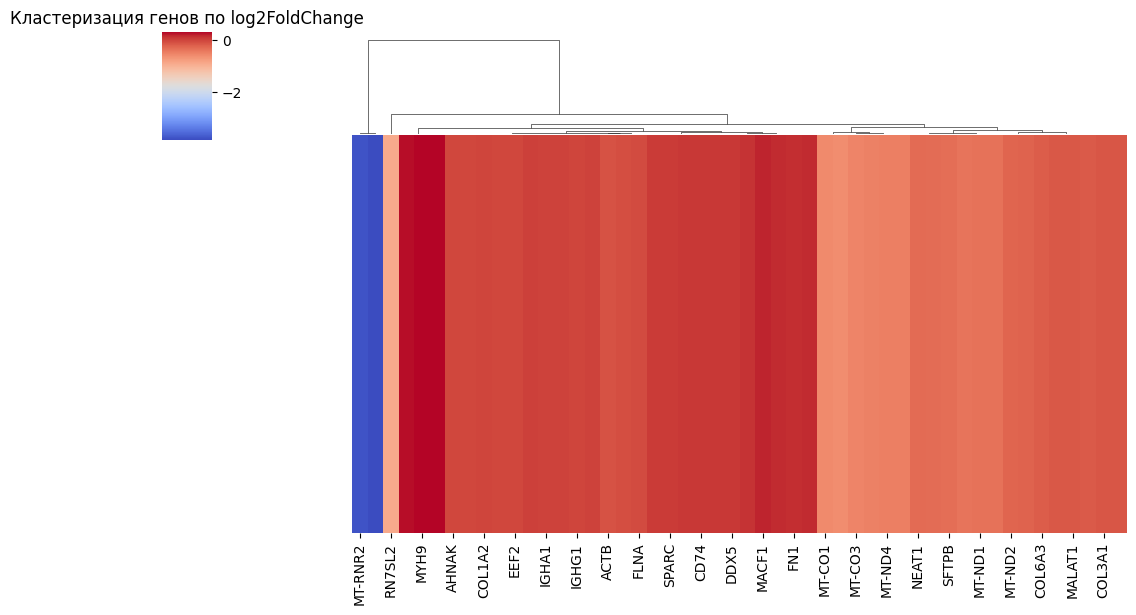

In [3]:
data = pd.read_csv('differential_expression_results_ICI.csv', index_col=0)
data_clean = data.dropna(subset=['log2FoldChange', 'baseMean'])

top_genes = data_clean.nlargest(50, 'baseMean')

matrix = top_genes[['log2FoldChange']].T  

sns.clustermap(matrix, 
               cmap='coolwarm', 
               figsize=(10, 6),
               col_cluster=True,  
               row_cluster=False,  
               yticklabels=False) 

plt.title('Кластеризация генов по log2FoldChange')
plt.show()

теперь удалим все гены, медианная экспрессия которых меньше 0.25 квартили всех медианных экспрессий

In [14]:
file_path = 'normalized_counts_ici_samples.tsv'
df = pd.read_csv(file_path, sep='\t', index_col=0)

print("Исходный размер датасета:", df.shape)
median_expression = df.median(axis=1)
q1 = median_expression.quantile(0.25)

print(f"0.25 квантиль медианной экспрессии: {q1}")
filtered_df = df[median_expression >= q1]

print("Размер после фильтрации:", filtered_df.shape)
output_path = 'filtered_normalized_counts_ICI.csv'
filtered_df.to_csv(output_path, sep='\t')

median_expression

Исходный размер датасета: (58233, 61)
0.25 квантиль медианной экспрессии: 0.0
Размер после фильтрации: (58233, 61)


ENSG00000223972     0.00000
ENSG00000227232     0.00000
ENSG00000278267     0.00000
ENSG00000243485     0.00000
ENSG00000284332     0.00000
                     ...   
ENSG00000271254    42.52081
ENSG00000275405     0.00000
ENSG00000275987     0.00000
ENSG00000277475     0.00000
ENSG00000268674     0.00000
Length: 58233, dtype: float64

Из-за того, что большинство генов не экспрессируется, ничего не поменялось, и volcano plot будет точно таким же